## Series

In [2]:
import numpy as np
import pandas as pd
list_1= ['a', 'b', 'c', 'd']
labels = [1,2,3,4]
ser_1 = pd.Series(data=list_1, index=labels)
ser_1

arr_1 = np.array([1,2,3,4])
ser_2 = pd.Series(arr_1)
ser_2

dict_1 = {'f_name': 'Derek', 'l_name': 'Banas', 'age': 44}
ser_3 = pd.Series(dict_1)
ser_3

ser_2 * ser_2

np.exp(ser_2)

ser_4 = pd.Series({4: 5, 5:6, 6:7, 7:8}, name='rand_nums')
ser_4


4    5
5    6
6    7
7    8
Name: rand_nums, dtype: int64

## DataFrames

In [53]:
arr2 = np.random.randint(10, 50, size=(2,3))
df1 = pd.DataFrame(arr2, ['A', 'B'], ['C', 'D', 'E'])
df1

dict3 = {'one': pd.Series([1.,2.,3.], index=['a', 'b', 'c']),
         'two': pd.Series([1.,2.,3.,4.], index=['a', 'b', 'c','d'])
        }
df2 = pd.DataFrame(dict3)
df2

pd.DataFrame.from_dict(dict([('A', [1,2,3]), ('B', [4,5,6])]))
pd.DataFrame.from_dict(dict([('A', [1,2,3]), ('B', [4,5,6])]),
                             orient='index', columns=['one', 'two', 'three']
                            )
print(df1.shape)

(2, 3)


In [54]:
print(df1)
print(df1[['C', 'E']])
print(df1.loc['A'])
print(df1.iloc[1])
print(df1.loc['A', 'E'])
print(df1.loc[['A', 'B'], ['D', 'E']])
df1['Total'] = df1['C'] + df1['D'] + df1['E']
print(df1)
df2['mult'] = df2['one'] * df2['two']
df2
dict2 = {'C': 44, 'D': 45, 'E': 46}
new_row = pd.Series(dict2, name='F')
df1 = df1.append(new_row)
print(df1)
df1.drop('Total', axis=1, inplace=True)
print(df1)

df1.drop('B', axis=0, inplace=True)
print(df1)

df1['Sex'] = ['Men', 'Women']
df1.set_index('Sex', inplace=True)
print(df1)

    C   D   E
A  27  29  11
B  28  32  32
    C   E
A  27  11
B  28  32
C    27
D    29
E    11
Name: A, dtype: int64
C    28
D    32
E    32
Name: B, dtype: int64
11
    D   E
A  29  11
B  32  32
    C   D   E  Total
A  27  29  11     67
B  28  32  32     92
      C     D     E  Total
A  27.0  29.0  11.0   67.0
B  28.0  32.0  32.0   92.0
F  44.0  45.0  46.0    NaN
      C     D     E
A  27.0  29.0  11.0
B  28.0  32.0  32.0
F  44.0  45.0  46.0
      C     D     E
A  27.0  29.0  11.0
F  44.0  45.0  46.0
          C     D     E
Sex                    
Men    27.0  29.0  11.0
Women  44.0  45.0  46.0


In [63]:
df2.assign(div=lambda x: (x['one'] / x['two']))
df3 = pd.DataFrame({'A': [1., np.nan, 3., np.nan]})
df4 = pd.DataFrame({'A': [8., 9., 2., 4.]})
df3.combine_first(df4)

,A
0,1.0
1,9.0
2,3.0
3,4.0


## Conditional Selection

In [83]:
arr2 = np.random.randint(10, 50, size=(2,3))
df1 = pd.DataFrame(arr2, ['A', 'B'], ['C', 'D', 'E'])
print(df1)

# gt, lt, ge, le, eq, ne
print('Greater than 40\n', df1 > 40)
print('Greater than 40\n', df1.gt(40.0))

bool1 = df1 >= 45.0
print(df1[bool1])

print(df1['E'] > 40)

print(df1[df1['E'] > 30])

df2 = df1[df1['E'] > 30]
print(df2[['C', 'D']])

arr3 = np.array([[1,2,3], [4,5,6],[7,8,9]])
df2 = pd.DataFrame(arr3, ['A', 'B', 'C'], ['X', 'Y', 'Z'])
df2[(df2['X'] > 3) | (df2['X'] < 7)]

    C   D   E
A  38  27  20
B  29  47  36
Greater than 40
        C      D      E
A  False  False  False
B  False   True  False
Greater than 40
        C      D      E
A  False  False  False
B  False   True  False
    C     D   E
A NaN   NaN NaN
B NaN  47.0 NaN
A    False
B    False
Name: E, dtype: bool
    C   D   E
B  29  47  36
    C   D
B  29  47


,X,Y,Z
A,1,2,3
B,4,5,6
C,7,8,9


## File Input / Output

In [96]:
nasdaq = pd.read_csv('nasdaq.csv')
nasdaq['Last Sale'] = nasdaq['Last Sale'].replace({'\$': '', ',': ''}, regex=True).astype(float)
nasdaq[(nasdaq['Market Cap']/1000000 > 100.0) & (nasdaq['Country'] == 'China') & (nasdaq['IPO Year'] >= 2018) & (nasdaq['Last Sale'] > 20)]

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
454,API,Agora Inc. American Depositary Shares,43.97,-1.80,-3.933%,1.745160e+10,China,2020.0,933615,Technology,Computer Software: Prepackaged Software
820,BEKE,KE Holdings Inc American Depositary Shares (ea...,66.82,2.36,3.661%,7.876604e+10,China,2020.0,3483145,Finance,Real Estate
893,BILI,Bilibili Inc. American Depositary Shares,87.61,2.93,3.46%,3.026285e+10,China,2018.0,7172960,Technology,EDP Services
972,BNR,Burning Rock Biotech Limited American Deposita...,24.55,0.32,1.321%,2.548401e+09,China,2020.0,146691,Health Care,Medical Specialities
1807,DADA,Dada Nexus Limited American Depositary Shares,37.83,-2.56,-6.338%,8.837358e+09,China,2020.0,3743790,Technology,Computer Software: Programming Data Processing
2134,EH,EHang Holdings Limited ADS,25.75,5.95,30.051%,1.409262e+09,China,2019.0,3844271,Transportation,Air Freight/Delivery Services
3391,IMAB,I-MAB American Depositary Shares,40.58,0.75,1.883%,2.860716e+09,China,2020.0,51370,Health Care,Major Pharmaceuticals
3669,KC,Kingsoft Cloud Holdings Limited American Depos...,45.93,-1.52,-3.203%,1.001356e+10,China,2020.0,1622890,Technology,Computer Software: Prepackaged Software
3887,LI,Li Auto Inc. American Depositary Shares,32.86,1.09,3.431%,2.949494e+10,China,2020.0,20181379,Capital Goods,Auto Manufacturing
4274,MNSO,MINISO Group Holding Limited American Deposita...,27.85,3.95,16.527%,8.465715e+09,China,2020.0,2608408,Consumer Services,Department/Specialty Retail Stores


In [114]:
nasdaq1 = pd.read_csv('nasdaq.csv', usecols=["Symbol", "Name"], squeeze=True)
nasdaq1

,Symbol,Name
0,A,Agilent Technologies Inc. Common Stock
1,AA,Alcoa Corporation Common Stock
2,AACG,ATA Creativity Global American Depositary Shares
3,AACQ,Artius Acquisition Inc. Class A Common Stock
4,AACQU,Artius Acquisition Inc. Unit
...,...,...
7240,ZUO,Zuora Inc. Class A Common Stock
7241,ZVO,Zovio Inc. Common Stock
7242,ZYME,Zymeworks Inc. Common Shares
7243,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock


In [109]:
import psycopg2

try:
    conn = psycopg2.connect("dbname=aurora user=postgres password=postgres")
    df = pd.read_sql('select * from topics', con=conn)
    df.set_index('id', inplace=True)
except Exception as e:
    print('Error: {}'.format(e))
finally:
    conn.close()

# try:
#     conn = psycopg2.connect("dbname=aurora user=postgres password=postgres")
#     cursor = conn.cursor()
#     insert_stmt = "insert into topics(name, description) values('English', 'Teach you English')"
#     cursor.execute(insert_stmt)
#     conn.commit()
#     df = pd.read_sql('select * from topics', con=conn)
#     df.set_index('id', inplace=True)
# except Exception as e:
#     print('Error: {}'.format(e))
# finally:
#     conn.close()
df

,name,description,created_at,updated_at
id,,,,
1,unburden,Chat to unburden oneself,2020-08-30 16:33:33.380242,2020-08-30 16:33:33.380242
2,serendipity,Talk to someone to get inspiration,2020-08-30 16:33:33.380242,2020-08-30 16:33:33.380242
3,high school math,Need help on high school math,2020-08-30 16:33:33.380242,2020-08-30 16:33:33.380242
4,English,Teach you English,2020-12-22 05:04:04.363741,2020-12-22 05:04:04.363741
5,English,Teach you English,2020-12-22 05:04:09.199270,2020-12-22 05:04:09.199270


## Basic Math

In [146]:
nasdaq.tail()
nasdaq[:5:2]
nasdaq.index.array
nasdaq.to_numpy()

dict3 = {'one': pd.Series([1.,2.,3.], index=['a', 'b','c']),
         'two': pd.Series([1.,2.,3.,4.], index=['a', 'b','c','d'])
        }
df2 = pd.DataFrame(dict3)
df2.fillna(0, inplace=True)
print(df2)
row = df2.iloc[1]
print(row)
df2.add(row, axis='columns')

col = df2['two']
print(col)
df2.sub(col, axis=0)
df2.empty

df5 = pd.DataFrame({'A': range(3), 'B': range(1,4)})
df5.transform([lambda x: np.sqrt(x), lambda x: x**3])

df5.transform({'A': lambda x: x**2, 'B': lambda x: x**3 })
df5['A'].map(lambda x: x**2)
df5.applymap(lambda x: x**2)

df2['two'].unique()
df2['two'].nunique()

df2['two'].value_counts()
df2.columns
df2.index
df2.isnull()

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  0.0  4.0
one    2.0
two    2.0
Name: b, dtype: float64
a    1.0
b    2.0
c    3.0
d    4.0
Name: two, dtype: float64


,one,two
a,False,False
b,False,False
c,False,False
d,False,False


## Group Data

In [154]:
dict5 = {'Store': [1,2,1,2], 'Flavor': ['Choc', 'Van', 'Straw', 'Choc'], 'Sales': [26, 12, 18, 22]}
df5 = pd.DataFrame(dict5)
print(df5)

by_store = df5.groupby('Store')
by_store.mean()
by_store.sum().loc[1]
by_store.describe()

   Store Flavor  Sales
0      1   Choc     26
1      2    Van     12
2      1  Straw     18
3      2   Choc     22


Sales                                              
      count  mean       std   min   25%   50%   75%   max
Store                                                    
1       2.0  22.0  5.656854  18.0  20.0  22.0  24.0  26.0
2       2.0  17.0  7.071068  12.0  14.5  17.0  19.5  22.0

## Concatenate Merge &* Join Data

In [171]:
df6 = pd.DataFrame({'A': [1,2,3], 'B': [4,5,6]}, index=[1,2,3])
df7 = pd.DataFrame({'A': [7,8,9], 'B': [10,11,12]}, index=[4,5,6])
print(pd.concat([df6, df7]))

df6 = pd.DataFrame({'A': [1,2,3], 'B': [4,5,6], 'key': [1,2,3]})
df7 = pd.DataFrame({'A': [7,8,9], 'B': [10,11,12], 'key': [1,2,3]})
pd.merge(df6, df7, how='inner', on='key')

df6 = pd.DataFrame({'A': [1,2,3], 'B': [4,5,6]}, index=[1,2,3])
df7 = pd.DataFrame({'C': [7,8,9], 'D': [10,11,12]}, index=[1,4,5])
df6.join(df7, how='outer')

   A   B
1  1   4
2  2   5
3  3   6
4  7  10
5  8  11
6  9  12


,A,B,C,D
1,1.0,4.0,7.0,10.0
2,2.0,5.0,NaN,NaN
3,3.0,6.0,NaN,NaN
4,NaN,NaN,8.0,11.0
5,NaN,NaN,9.0,12.0


## Statistics

In [206]:
df = pd.read_csv('Icecream.csv', index_col=0)
print(df.describe())

ser_dice = pd.Series(data=[2,3,3,4,4,4,5,5,5,5,6,6,6,6,6,7,7,7,7,7,7,7,8,8,8,8,8,8,8,9,9,9,9,9,10,10,10,11,11,12])
ser_dice.value_counts()

print(df2)

df.agg(['mean', 'std', 'var', 'sem', 'kurt', 'max', 'min', 'mad'])

            cons    income      price       temp
count  30.000000  30.00000  30.000000  30.000000
mean    0.359433  84.60000   0.275300  49.100000
std     0.065791   6.24555   0.008342  16.421916
min     0.256000  76.00000   0.260000  24.000000
25%     0.311250  79.25000   0.268500  32.250000
50%     0.351500  83.50000   0.277000  49.500000
75%     0.391250  89.25000   0.281500  63.750000
max     0.548000  96.00000   0.292000  72.000000
   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  0.0  4.0


,cons,income,price,temp
mean,0.359433,84.600000,0.275300,49.100000
std,0.065791,6.245550,0.008342,16.421916
var,0.004328,39.006897,0.000070,269.679310
sem,0.012012,1.140276,0.001523,2.998218
kurt,0.831213,-0.899247,-0.793743,-1.554810
max,0.548000,96.000000,0.292000,72.000000
min,0.256000,76.000000,0.260000,24.000000
mad,0.052662,5.146667,0.006860,14.766667


## Iteration

In [214]:
ser7 = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
arr4 = np.random.randint(10, 50, size=(2,3))
df8 = pd.DataFrame(arr4, ['B', 'C'], ['C', 'D', 'E'])
for col in ser7:
    print(col)
    
for label, ser in df8.items():
    print(label)
    print(ser)
    
for index, row in df8.iterrows():
    print(f'--- {index}\n{row}')
    
for row in df8.itertuples():
    print(row)

0
1
2
3
4
C
B    31
C    34
Name: C, dtype: int64
D
B    29
C    18
Name: D, dtype: int64
E
B    14
C    48
Name: E, dtype: int64
--- B
C    31
D    29
E    14
Name: B, dtype: int64
--- C
C    34
D    18
E    48
Name: C, dtype: int64
Pandas(Index='B', C=31, D=29, E=14)
Pandas(Index='C', C=34, D=18, E=48)


## Sorting

In [215]:
print(df8)

    C   D   E
B  31  29  14
C  34  18  48


In [218]:
df8.sort_index(ascending=False)
df8.sort_values(by='D')

,C,D,E
C,34,18,48
B,31,29,14


## Pass data to function

In [236]:
import sys

ice_df = df.copy()

def get_profit_total(df):
    prof_ser = df['income']
    print(f'Total profit: {prof_ser.sum()}')

get_profit_total(ice_df)

def split_name(df):
    def get_name(full_name):
        f_name, l_name = full_name.split()
        return pd.Series((f_name, l_name), index=['First', 'Last'])
    
    names = df['Contact'].apply(get_name)
    df[names.columns] = names
    return df

cs_df = pd.DataFrame({'Contact': ['Tyr Chen', 'Lindsey Chen', 'Rosie Chen'], 'Age': [38, 8, 4]})
split_name(cs_df)

def create_age_groups(df):
    bins = [0, 30, 50, sys.maxsize]
    labels = ['<30', '30-50', '>50']
    age_group = pd.cut(df['Age'], bins=bins, labels=labels)
    df['Age Group'] = age_group
    return df

aged_cf = create_age_groups(cs_df)
aged_cf['Age Group'] == '<30'

cs_df.pipe(split_name).pipe(create_age_groups)

Total profit: 2538


,Contact,Age,First,Last,Age Group
0,Tyr Chen,38,Tyr,Chen,30-50
1,Lindsey Chen,8,Lindsey,Chen,<30
2,Rosie Chen,4,Rosie,Chen,<30


## Aligning, reindex and renaming labels

In [258]:
ser6 = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
sl1 = ser6[:4]
sl2 = ser6[1:]
print(sl1, '\n\n', sl2)
sl1.align(sl2, join='inner')

arr3 = np.random.randint(10, 50, size=(2,3))
df6 = pd.DataFrame(arr3, ['A', 'B'], ['C', 'D', 'E'])
arr3 = np.random.randint(10, 50, size=(2,3))
df7 = pd.DataFrame(arr3, ['B', 'C'], ['C', 'D', 'E'])
print(df6, '\n\n', df7)
df6.align(df7)

ser6.reindex(['c', 'b', 'a'])
df6.reindex(['B'])

df6.drop(['D'], axis=1)

df6.rename(columns={'C': 'Men', 'D': 'Women', 'E': 'Pets'})

a    0
b    1
c    2
d    3
dtype: int64 

 b    1
c    2
d    3
e    4
dtype: int64
    C   D   E
A  13  27  42
B  45  12  13 

     C   D   E
B  40  48  36
C  44  49  27


,Men,Women,Pets
A,13,27,42
B,45,12,13


## MultiIndex

In [10]:
days = ['Day 1', 'Day 1', 'Day 1', 'Day 2', 'Day 2', 'Day 2']
meals = [1, 2, 3, 1, 2, 3]
hier_index = list(zip(days, meals))
print(hier_index)

her_index = pd.MultiIndex.from_tuples(hier_index)
print(her_index)

arr5 = np.random.randint(500, 700, size=(6,2))
df9 = pd.DataFrame(arr5, her_index, ['M', 'F'])
print(df9)

df9.index.names = ['Day', 'Meal']
df9
df9.loc['Day 2']
df9.xs('Day 2')
df9.xs(1, level='Meal')

[('Day 1', 1), ('Day 1', 2), ('Day 1', 3), ('Day 2', 1), ('Day 2', 2), ('Day 2', 3)]
MultiIndex([('Day 1', 1),
            ('Day 1', 2),
            ('Day 1', 3),
            ('Day 2', 1),
            ('Day 2', 2),
            ('Day 2', 3)],
           )
           M    F
Day 1 1  554  613
      2  650  596
      3  556  656
Day 2 1  580  659
      2  559  663
      3  602  614


,M,F
Day,,
Day 1,554,613
Day 2,580,659


## Handle Missing Data

In [22]:
dict4 = {'A': [1,2,np.nan], 'B': [4, np.nan, np.nan], 'C': [7.,8.,9.]}
df10 = pd.DataFrame(dict4)

# drop all rows containing na
df10.dropna()
# drop all cols containing na
df10.dropna(axis=1)
# drop with threshold
df10.dropna(thresh=2)

df10.fillna(value=0.0)
df10.fillna(value=df10['A'].mean())
# forward fill
print(df10.fillna(method='ffill'))
# back fill
print(df10.fillna(method='bfill'))

     A    B    C
0  1.0  4.0  7.0
1  2.0  4.0  8.0
2  2.0  4.0  9.0
     A    B    C
0  1.0  4.0  7.0
1  2.0  NaN  8.0
2  NaN  NaN  9.0


## Experimenting with Data

In [62]:
nasdaq = pd.read_csv('nasdaq.csv')
# print(nasdaq.columns)
nasdaq
nasdaq['Volume'].mean()
nasdaq[(nasdaq['IPO Year'] == 2020) & (nasdaq['Country'] == 'China') & (nasdaq['Market Cap'] >= 1000000000)]

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
454,API,Agora Inc. American Depositary Shares,$43.97,-1.80,-3.933%,1.745160e+10,China,2020.0,933615,Technology,Computer Software: Prepackaged Software
820,BEKE,KE Holdings Inc American Depositary Shares (ea...,$66.82,2.36,3.661%,7.876604e+10,China,2020.0,3483145,Finance,Real Estate
972,BNR,Burning Rock Biotech Limited American Deposita...,$24.55,0.32,1.321%,2.548401e+09,China,2020.0,146691,Health Care,Medical Specialities
1248,CD,Chindata Group Holdings Limited American Depos...,$18.52,-1.07,-5.462%,6.652934e+09,China,2020.0,799028,NaN,NaN
1807,DADA,Dada Nexus Limited American Depositary Shares,$37.83,-2.56,-6.338%,8.837358e+09,China,2020.0,3743790,Technology,Computer Software: Programming Data Processing
3002,GTH,Genetron Holdings Limited ADS,$13.28,-0.08,-0.599%,1.173448e+09,China,2020.0,215768,Health Care,Medical Specialities
3391,IMAB,I-MAB American Depositary Shares,$40.58,0.75,1.883%,2.860716e+09,China,2020.0,51370,Health Care,Major Pharmaceuticals
3669,KC,Kingsoft Cloud Holdings Limited American Depos...,$45.93,-1.52,-3.203%,1.001356e+10,China,2020.0,1622890,Technology,Computer Software: Prepackaged Software
3887,LI,Li Auto Inc. American Depositary Shares,$32.86,1.09,3.431%,2.949494e+10,China,2020.0,20181379,Capital Goods,Auto Manufacturing
3997,LU,Lufax Holding Ltd American Depositary Shares t...,$14.76,-0.58,-3.781%,3.598703e+10,China,2020.0,7249233,Finance,Finance: Consumer Services


## Visualization

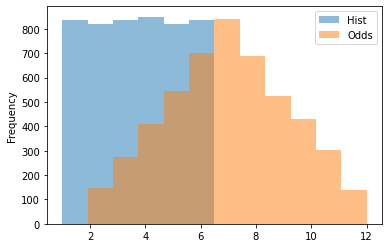

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

df_dice = pd.DataFrame(
    np.random.randint(1, 7, 5000),
    columns = ['Hist']
)
df_dice['Odds'] = df_dice['Hist'] + np.random.randint(1, 7, 5000)
ax = df_dice.plot.hist(bins=12, alpha=0.5)


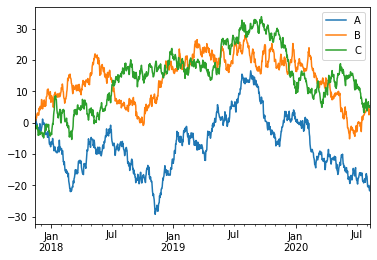

In [72]:
df5 = pd.DataFrame(np.random.randn(1000, 3), index=pd.date_range('11/15/2017', periods=1000), columns=list('ABC'))
df5 = df5.cumsum()
df5.plot()

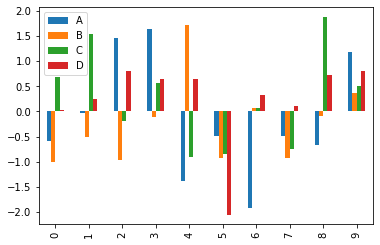

In [75]:
vals = ['A', 'B', 'C', 'D']
df15 = pd.DataFrame(np.random.randn(10, 4), columns=vals)
df15.plot.bar()

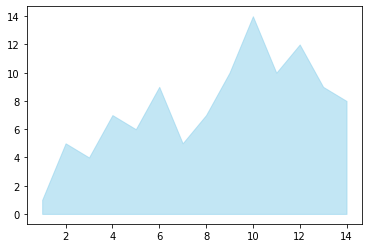

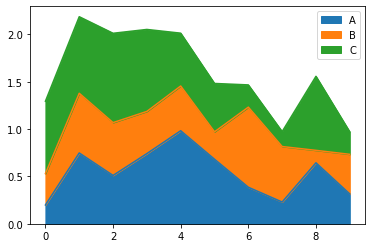

In [79]:
x_rng = range(1,15)
y_vals = [1,5,4,7,6,9,5,7,10,14,10,12,9,8]
plt.fill_between(x_rng, y_vals, color='skyblue', alpha=0.5)
plt.show()

pd.DataFrame(np.random.rand(10,3), columns=['A', 'B', 'C']).plot.area()

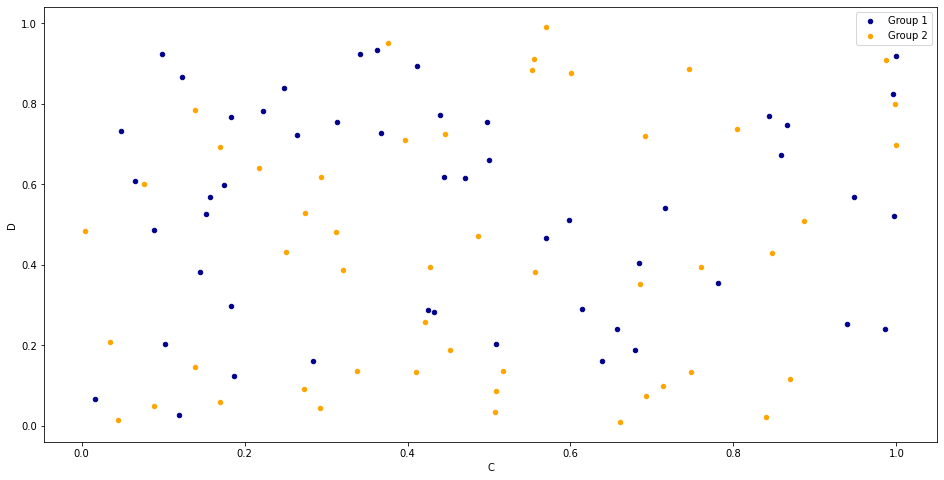

In [82]:
df15 = pd.DataFrame(np.random.rand(50, 4), columns=['A', 'B', 'C', 'D'])
ax = df15.plot.scatter(x='A', y='B', color='DarkBlue', label='Group 1')
df15.plot.scatter(x='C', y='D', color='Orange', label='Group 2', ax=ax, figsize=(16,8))

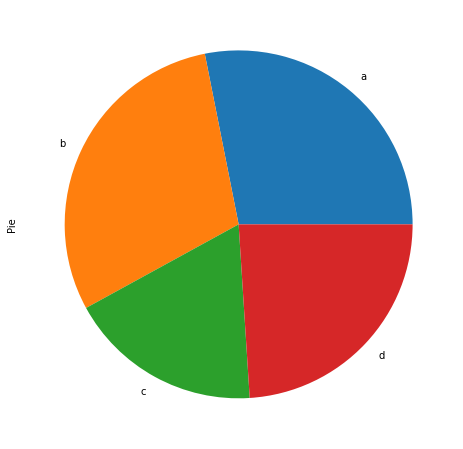

In [85]:
pd.Series(np.random.rand(4), index=list('abcd'), name='Pie').plot.pie(figsize=(8,8))